In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta, time
import random

In [59]:
df = pd.read_csv(r'../dataset/dimensions/dim_orders.csv')

In [60]:
df['platform_id'] = df['platform_id'].replace({1:'JioMart',2:'Blinkit',3:'Swiggy Instamart'})

In [61]:
df = df.rename(columns={'platform_id':'platform_name'})

C:\Users\danis\AppData\Local\Temp\ipykernel_10180\1511733072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


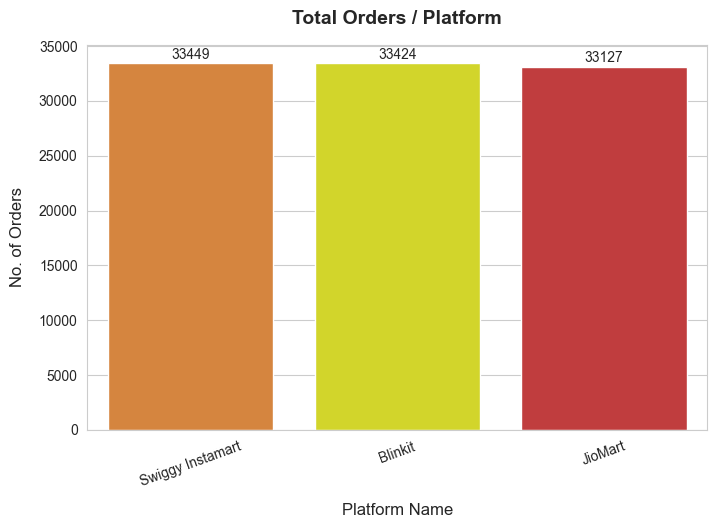

In [64]:
colors = ["#ee8326", "#edf10f", "#d62728"]

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df, 
    x='platform_name', 
    order=df['platform_name'].value_counts().index,
    palette=colors
)

# loop over all bar containers to show labels everywhere
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=1)

ax.set_xlabel("Platform Name", fontsize=12, labelpad=10)
ax.set_ylabel("No. of Orders", fontsize=12, labelpad=10)
ax.set_title("Total Orders / Platform", fontsize=14, weight='bold', pad=15)

plt.xticks(rotation=20, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [56]:
temp = pd.DataFrame(df['product_category_id'].replace({1:'Dairy',2:'Grocery',3:'Snacks',4:'Fruits & Vegetables',5:'Beverages',6:'Personal Care'}))

C:\Users\danis\AppData\Local\Temp\ipykernel_10180\3807995302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')


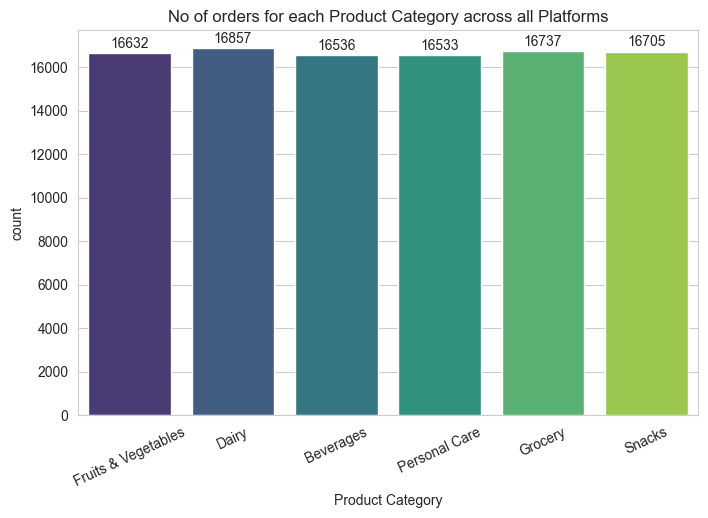

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')

for cont in ax.containers:
    ax.bar_label(cont,fmt='%d',padding=2)

ax.set_xlabel('Product Category')
ax.set_ylabel;('No of Orders')
ax.set_title('No of orders for each Product Category across all Platforms')

plt.xticks(rotation=25,fontsize=10)

plt.show()




In [67]:
Order_Sum = round(df['order_value_inr'].sum())
print(f"Total Sum Orders Amount across all platform is: ₹{Order_Sum}")

print()

Order_Sum_platform = df.groupby('platform_name')['order_value_inr'].sum().round()
print(f"Total Sum Orders Amount for each platform is")
for platform , value in Order_Sum_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_Avg = round(df['order_value_inr'].mean())
print(f"Average of total Orders Amount across all platform is: ₹{Order_Avg}")

print()


Order_Avg_platform = df.groupby('platform_name')['order_value_inr'].mean().round()
print(f"Average Order amount for each platfrom:")
for platform, value in Order_Avg_platform.items():
    print(f"{platform}: ₹{value}")


print()

Order_max_platform = df.groupby('platform_name')['order_value_inr'].max().round()
print(f"Max Order amount for each platfrom:")
for platform, value in Order_max_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_min_platform = df.groupby('platform_name')['order_value_inr'].min().round()
print(f"Minimum Order amount for each platfrom:")
for platform, value in Order_min_platform.items():
    print(f"{platform}: ₹{value}")




Total Sum Orders Amount across all platform is: ₹59225643

Total Sum Orders Amount for each platform is
Blinkit: ₹19856117
JioMart: ₹19551516
Swiggy Instamart: ₹19818010

Average of total Orders Amount across all platform is: ₹592

Average Order amount for each platfrom:
Blinkit: ₹594.0
JioMart: ₹590.0
Swiggy Instamart: ₹592.0

Max Order amount for each platfrom:
Blinkit: ₹5445
JioMart: ₹2000
Swiggy Instamart: ₹1996

Minimum Order amount for each platfrom:
Blinkit: ₹20
JioMart: ₹22
Swiggy Instamart: ₹50


In [70]:
Delivery_Avg = round(df['delivery_time_min'].mean())
print(f"Average Delivery time across all platform is: {Delivery_Avg}min")

print()

Avg_Delivery = df.groupby('platform_name')['delivery_time_min'].mean().round()
print(f"Average delivery time for each platform is:")
for platform, value in Avg_Delivery.items():
    print(f"{platform}: {value}min")

print()


Fastest_Delivery = df.groupby('platform_name')['delivery_time_min'].min()
print(f"Fastest delivery time for each platform is:")
for platform, value in Fastest_Delivery.items():
    print(f"{platform}: {value}min")


print()

Slowest_Delivery = df.groupby('platform_name')['delivery_time_min'].max()
print(f"Slowest delivery time fro each platform is:")
for platform, value in Slowest_Delivery.items():
    print(f"{platform}: {value}min")






Average Delivery time across all platform is: 14min

Average delivery time for each platform is:
Blinkit: 13.0min
JioMart: 18.0min
Swiggy Instamart: 12.0min

Fastest delivery time for each platform is:
Blinkit: 5.0min
JioMart: 5.0min
Swiggy Instamart: 4.0min

Slowest delivery time fro each platform is:
Blinkit: 76.0min
JioMart: 73.0min
Swiggy Instamart: 45.0min


In [64]:
def random_datetime():
    start_date = datetime(2025,3,1)
    end_date = datetime(2025,3,12)

    random_days = random.randint(0,(end_date-start_date).days)

    date = start_date + timedelta(days=random_days)

    while True:
        hour = random.randint(0,3)
        minute = random.randint(0,59)

        if not (3 <= hour < 5):
            break
    
    dt = datetime.combine(date,time(hour,minute))
    return dt

df['order_datetime'] = [random_datetime() for _ in range(len(df))]




In [68]:
df.to_csv(r'../dataset/cleaned_orders.csv',index=False)